
usando el dataset de consumo eléctrico del fichero proporcionado confecciona un modelo de rnn para hacer predicciones (puedes usar las funciones de pandas resample para reducir a una muestra por hora  y rolling para suavizar algo la curva)

In [1]:
import numpy as np
np.random.seed(5)

import matplotlib.pyplot as plt

import pandas as pd
import datetime


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


from keras.layers import Input, Dense, SimpleRNN
from keras.models import Model
from keras.optimizers import SGD
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv("archives/consumo_electrico.csv")

df = df[["Global_active_power"]]

In [3]:
from sklearn.preprocessing import MinMaxScaler

model = MinMaxScaler().fit(df)
df = model.transform(df)

In [4]:
def genera_train(serie, lg_secuencia, lg_y):
  x=[]
  y=[]
  ultimo = len(serie)-lg_secuencia-lg_y
  for ix in range(ultimo):
    x.append(serie[ix:ix+lg_secuencia])
    y.append(serie[ix+lg_secuencia:ix+lg_secuencia+lg_y])
  return np.array(x), np.array(y)

In [5]:
lg_sec = 50
x, y = genera_train(df[:5000], lg_sec, 1)
limite = int(len(x) * 0.8)
X_train, y_train = x[:limite], y[:limite]
X_test, y_test = x[limite:], y[limite:]

y_train = y_train.reshape(y_train.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


In [6]:
def modelo_predice_igual_ultimo(x):
  ret = []
  for e in x:
    ret.append(e[-1])
  return ret

def modelo_regresion_lineal(x):
  ret = []
  for e in x:
    regresor = LinearRegression()
    vx = [[i] for i in range(len(e))]
    vy = [[e[i]] for i in range(len(e))]

    regresor.fit(vx, vy)
    r1 = regresor.predict([[len(e)]])
    ret.append(r1)
  ret = np.concatenate(ret)
  return ret

def modelo_red_densa(x_train, y_train):
  model = keras.models.Sequential([
      keras.layers.Input(shape=(lg_sec,)),
      keras.layers.Dense(30, activation="relu"),
      keras.layers.Dense(30, activation="relu"),
      keras.layers.Dense(1)
  ])
  model.compile(loss="mse", optimizer="adam")
  model.fit(x_train, y_train, epochs=100)
  return model

def modelo_red_recurrente_1(x_train, y_train):
  model = keras.models.Sequential([
      keras.layers.SimpleRNN(1, return_sequences=False, input_shape=[None, 1])
  ])
  model.compile(loss="mse", optimizer="adam")
  model.fit(x_train, y_train, epochs=100)
  return model

def modelo_red_recurrente_2(x_train, y_train):
  model = keras.models.Sequential([
      keras.layers.SimpleRNN(100, return_sequences=False, input_shape=[None, 1]),
      keras.layers.Dense(1)
  ])
  model.compile(loss="mse", optimizer="adam")
  model.fit(x_train, y_train, epochs=50)
  return model

def modelo_red_recurrente_3(x_train, y_train):
  model = keras.models.Sequential([
      keras.layers.SimpleRNN(50, return_sequences=True, input_shape=[None, 1]),
      keras.layers.SimpleRNN(50, return_sequences=False),
      keras.layers.Dense(1)
  ])
  model.compile(loss="mse", optimizer="adam")
  model.fit(x_train, y_train, epochs=50)
  return model

In [7]:
def plot_serie(serie, lg_sec, y, y_pred ):
  fig=plt.figure(figsize=(15,5))
  plt.plot(serie)
  plt.plot(lg_sec, y, "bo")
  plt.plot(lg_sec, y_pred, "rx")

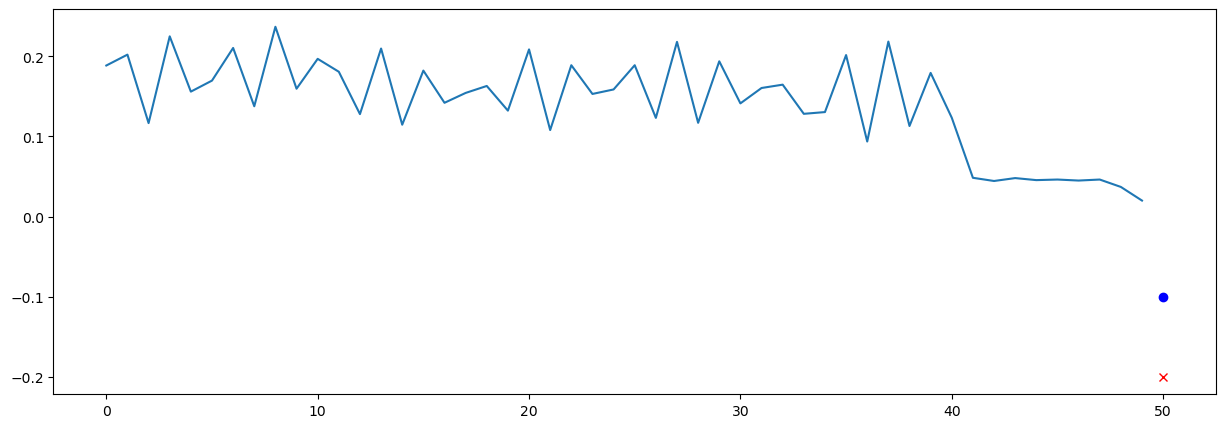

In [8]:
plot_serie(X_test[0], lg_sec, -0.1, -0.2)

c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


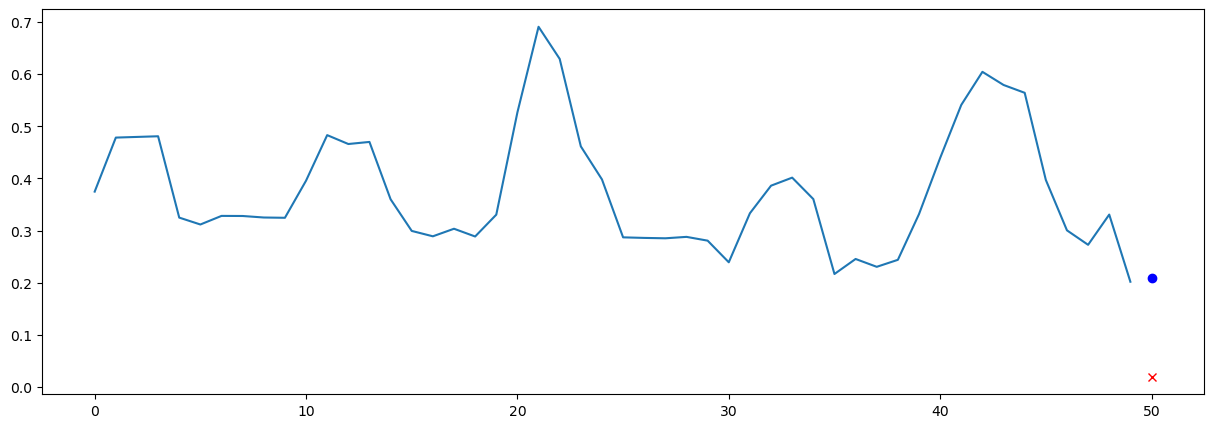

In [9]:
y_pred = modelo_predice_igual_ultimo(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
plot_serie(X_train[0], lg_sec, y_train[0], y_pred[0])

c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


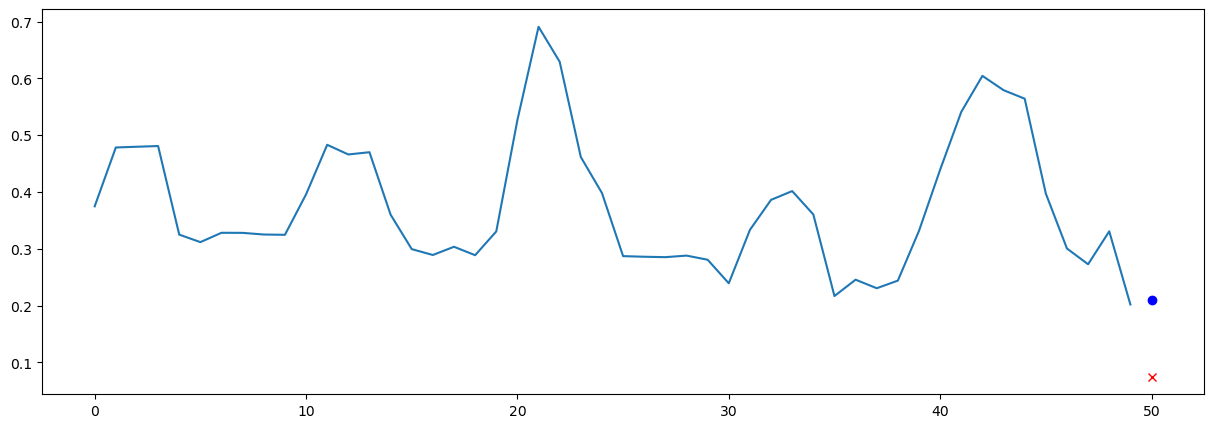

In [10]:
y_pred = modelo_regresion_lineal(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
plot_serie(X_train[0], lg_sec, y_train[0], y_pred[0])

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0234  
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0034
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031 
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020
Epoch 8/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021
Epoch 9/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019   
Epoch 10/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019
Epoch 11/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019 
Epoch 12/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020
Epoch 13/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0018
Epoch 14/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017
Epoch 15/100
124/124 ━━━━━━━━━━━━━━━

c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


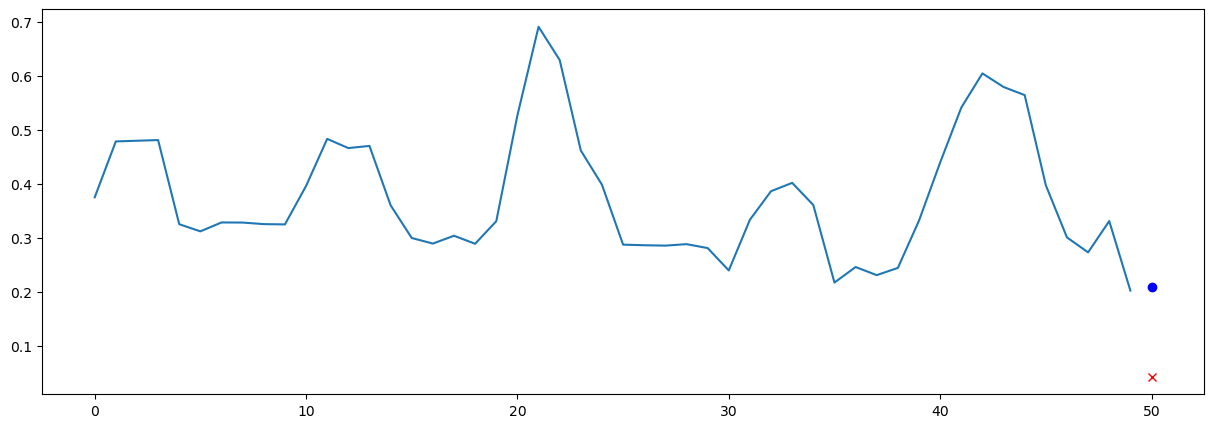

In [11]:
modelo = modelo_red_densa(X_train, y_train)
y_pred = modelo.predict(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
plot_serie(X_train[0], lg_sec, y_train[0], y_pred[0])

c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1289
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0343
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0136
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0071
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0047
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0036
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0031
Epoch 8/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0027
Epoch 9/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0027
Epoch 10/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0025
Epoch 11/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0027
Epoch 12/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0026
Epoch 13/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0026
Epoch 14/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0027
Epoch 15/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (48.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8 (36.00 B)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


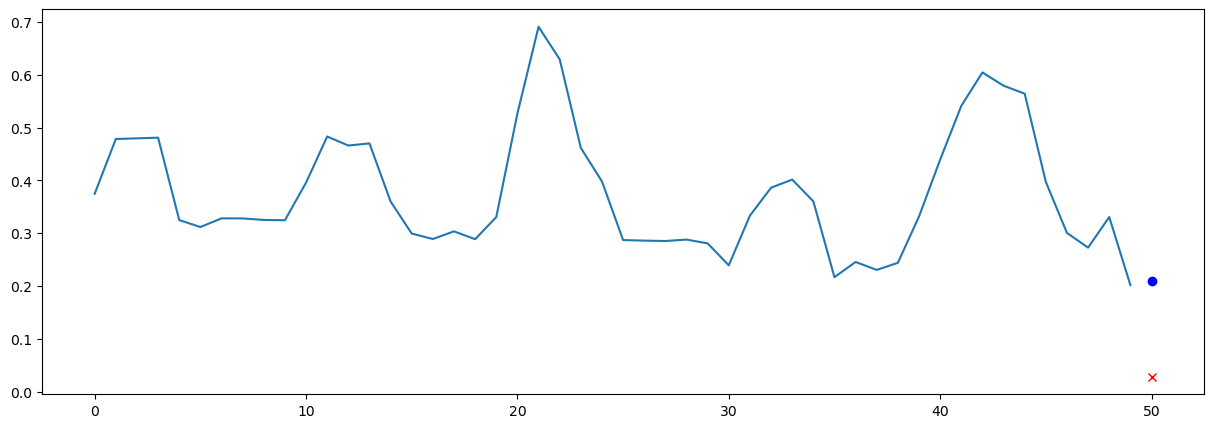

In [12]:
modelo = modelo_red_recurrente_1(X_train, y_train)
modelo.summary()
y_pred = modelo.predict(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
plot_serie(X_train[0], lg_sec, y_train[0], y_pred[0])

Epoch 1/50


c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0109
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0024
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0020
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0018
Epoch 10/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0018
Epoch 11/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0020
Epoch 12/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018
Epoch 13/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019
Epoch 14/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018
Epoch 15/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0020


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,905 (120.73 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,604 (80.49 KB)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


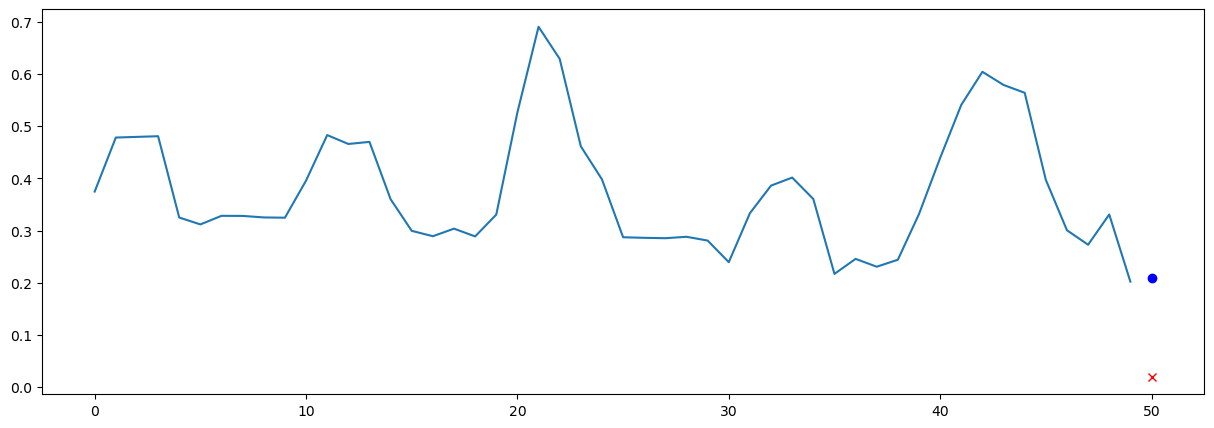

In [13]:
modelo = modelo_red_recurrente_2(X_train, y_train)
modelo.summary()
y_pred = modelo.predict(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
plot_serie(X_train[0], lg_sec, y_train[0], y_pred[0])

c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0236
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0031
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0024
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0028
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0024
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0021
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0024
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0022
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0022
Epoch 10/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0024
Epoch 11/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0019
Epoch 12/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0019
Epoch 13/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0021
Epoch 14/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0020
Epoch 15/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, None, 50)       │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,105 (90.26 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,404 (60.18 KB)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


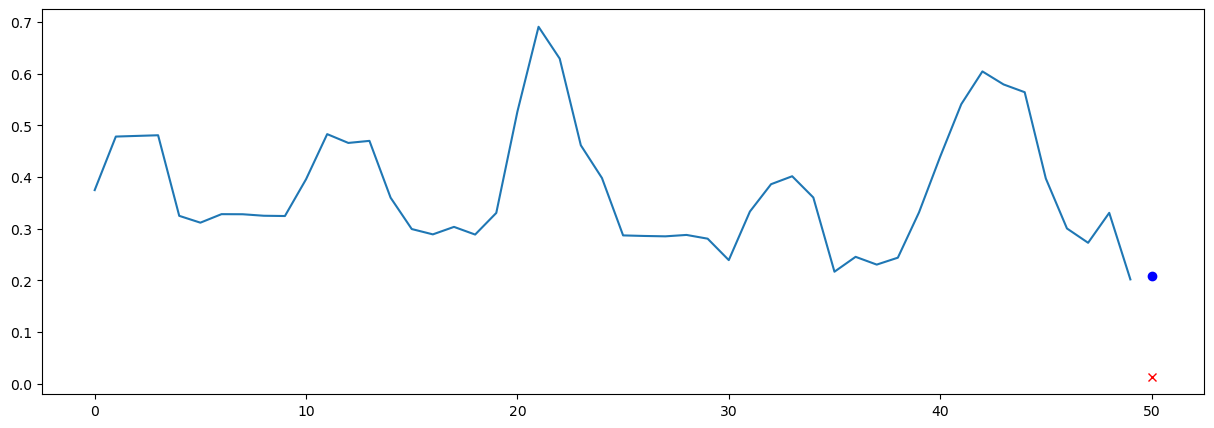

In [14]:
modelo = modelo_red_recurrente_3(X_train, y_train)
modelo.summary()
y_pred = modelo.predict(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
plot_serie(X_train[0], lg_sec, y_train[0], y_pred[0])

In [15]:
lg_y = 10
rnn_predice_10 = keras.models.Sequential([
    keras.layers.SimpleRNN(40, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(40),
    keras.layers.Dense(lg_y)
    ])
rnn_predice_10.compile(loss="mse", optimizer="adam")

c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
lg_y = 10

x, y = genera_train(df[:5000], lg_sec,  lg_y)
lim = int((len(x) * 0.8))
X_train, y_train = x[:lim], y[:lim]
X_test, y_test = x[lim:], y[lim:]

y_train = y_train.reshape(y_train.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

In [17]:
rnn_predice_10.fit(X_train, y_train, epochs=100)

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0364
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0054
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0052
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0046
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0048
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0043
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0043
Epoch 8/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0045
Epoch 9/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0043
Epoch 10/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0045
Epoch 11/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0045
Epoch 12/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0043
Epoch 13/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0043
Epoch 14/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0045
Epoch 15/100
124/124 ━━━━━━━━━━━━━━━━━━━━

In [18]:
y_pred = rnn_predice_10.predict(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f"rms rnn_predice_10 = {rms}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
rms rnn_predice_10 = 0.03559784700438802


c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
lg_y = 10
lg_sec = 1
x, y = genera_train(df[:5000], lg_sec,  lg_y)
lim = int((len(x) * 0.8))
X_train, y_train = x[:lim], y[:lim]
X_test, y_test = x[lim:], y[lim:]

rnn_predice_1_10 = keras.models.Sequential([
    keras.layers.SimpleRNN(40, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(40, return_sequences=True),
    keras.layers.Dense(lg_y)
    ])
rnn_predice_1_10.compile(loss="mse", optimizer="adam")
rnn_predice_1_10.fit(X_train, y_train, epochs=100)

y_train = y_train.reshape(y_train.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

Epoch 1/100


c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0136
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0056
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053
Epoch 10/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053
Epoch 11/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053
Epoch 12/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053
Epoch 13/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052
Epoch 14/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052
Epoch 15/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

In [20]:
y_pred = rnn_predice_10.predict(X_test)
y_pred = y_pred.reshape(y_pred.shape[0], -1)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f"rms rnn_predice_10 = {rms}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
rms rnn_predice_10 = 0.06962972223217073


c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
